In [1]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [3]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231006T005555Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEGEaCXVzLWVhc3QtMSJGMEQCIERD%2BIY3lLVwqRx6/prrMpLiZC3o3ko4AXxdIWqriLb4AiA1uNzwRNnF2rlvEPGu0kVJDJ69o9jkXet8Tajtw7/BCSq0BQhpEAIaDDMwNjMyMDUwMDIwNCIMD9arM4t2hOVdeEVXKpEFc%2BgKs0RfHS8I4XUjbWou5OF4YpzX4CpI/bwwusDVVbTUu8Z7aq4IWlaOvuFzGrKwsoQOB%2BNM79Ig3sKFAabuQ1hBpmslGI7I%2BAZbFm0eE4n%2BvDTDfzNzSv8EWOq5dcSWuaZOy06xARiUm2VR3zCTzhxSiqf4D0KdjTqpfjYgG57iB3KurCUfstfeLu3t6OSCbtsK/NrP/ml9lcV4oRAl6OPWa8J9wDgVIJjX9bxFEX0IhGSQ5jzzVwdoKDMiERHNW/1tUshmsrO7J6wK2HOCCN6NbQW7tDkWTVYVqAUQYQTvAI8lKX71%2BR0XE/qkAuE4Qs7SAlO0Mpy/NVxabAq2sN/hu4ybMcV4ukmF/02KjH2pGxbwXqmxhCohiD1eLSvIHwedSYFORo4%2BcHConvY7FxAp6d0VXK%2Byd0MOL71HGsAXzr/dOjXmwBQL7UNB59doH7n2yY/6yup83Ra6LaNl3YNGNSGaoD2xvOq6HRiuDSGF8mmuEXvVC3Hgf/Oir48SNO0ArPvRalByIl2ebWtGZSrUV9WwWSF/RfS%2BVsFhXnRmD%2B6bKVlXZ9RK2Le1Lzb6bBqAR1lRSDDp2B02frUwsitpuiRVXHeUGu1K

In [4]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088
150217957,Z4BR,51236,2023-08-31,197282.405592
150217958,Z4BR,22166,2023-08-31,321075.347722
150217959,Z4BR,54589,2023-08-31,144402.793079


In [5]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [6]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [7]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231006T005653Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEGEaCXVzLWVhc3QtMSJIMEYCIQCjTotoy%2B11MZO3l19KyKn44KS2dCKWFRrnWTgjJxO%2BJAIhAPD%2B1QB7v4fAY5iAxn1Jz%2BG9%2Bld9WQR4iIUtUV4dt6SBKrMFCGoQAhoMMzA2MzIwNTAwMjA0IgyFcnayBkDRDlTDZWwqkAVDKLo22fG1wQ0%2BVd783M5joXBe3%2BGOj5wLg4erjxMvDEHrwBL7SeJM6arjTINkwdkQj64sijXH2tPW62Z7ulKHmYcumUzYoKB5cssQmnl9YCwwnYw2Jy1uhSSsjSPQszIxdLh05qqiWfAyEB5hYQ0PJ/oZ9zUVfYGOWnfgWe16J8mZg6OT3itgJeXggEtrvYoGFy15O6csSwFMKP7EontIkBxj6rruEKxWQutVqlxD480y15y4xLrFnHq5hltJPiXg5oHv7bVlPsPq7TlBmklaF3iVZBKR7e5VuUVIBXBGawyYeS8z1Ebii2SDqHmQA7JWWrldlrpEQV4vo2rLIJea2WT6Lx0e6sGoFbsgvSe0WJ3hVa0K6ue5tn6IHkwjFFF9P1LLuII88mnf9Vk7OCj/Ly7tz7L9fLGammN8jEjOoj12VuOCxr9j8xg6cu8nPewgvzs7RJW8xVP2/Vv8WbQ5Zz%2B8EGtrWHJLlEOov7tREtpTNA0%2BdZO6zC4JH6kQsJopniLVEIkxycaEsx4FtqQkftmDTCcx3UvsooqdgGR9t8FAtMJcKDLkuxD6X6vTPPLDokIGhyqk7tFR9QwW1Avg9eIV1yh7

In [9]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [10]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
...,...,...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088,ZHVI 4-Bedroom Time Series ($),Home values
150217957,Z4BR,51236,2023-08-31,197282.405592,ZHVI 4-Bedroom Time Series ($),Home values
150217958,Z4BR,22166,2023-08-31,321075.347722,ZHVI 4-Bedroom Time Series ($),Home values
150217959,Z4BR,54589,2023-08-31,144402.793079,ZHVI 4-Bedroom Time Series ($),Home values


In [11]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z3BR,65461,2020-02-29,129328.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217957,Z3BR,65461,2020-03-31,128308.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217958,Z3BR,65461,2020-04-30,126284.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217959,Z3BR,65461,2020-05-31,124288.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...


In [12]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
2706868,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
2706869,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2706870,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706871,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706872,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
73310371,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
73310372,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
73310373,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
73310374,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [13]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [2]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166797,Z4BR,37,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166798,Z4BR,37,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166799,ZCON,37,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota


In [41]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166796,Z4BR,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166797,Z4BR,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166798,Z4BR,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166799,ZCON,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota


In [3]:
#show unique indicators
cleaning_df['indicator'].unique()

array(['ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 4-Bedroom Time Series ($)',
       'ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)', 'ZHVI 1-Bedroom Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 3-Bedroom Time Series ($)'], dtype=object)

In [4]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,region_id,value,indicator,category,region_type,region,year
0,Z5BR,11,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut,2020
1,Z4BR,11,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut,2020
2,ZATT,11,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2000
3,ZATT,11,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2001
4,ZATT,11,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2001
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166797,Z4BR,37,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166798,Z4BR,37,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166799,ZCON,37,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota,2023


In [5]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,region_id,price,property type,category,region_type,state,year
0,Z5BR,11,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut,2020
1,Z4BR,11,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut,2020
2,ZATT,11,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2000
3,ZATT,11,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2001
4,ZATT,11,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2001
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166797,Z4BR,37,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166798,Z4BR,37,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166799,ZCON,37,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota,2023


In [6]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,region_id,price,property type,category,region_type,state,year
0,Z5BR,11,652999,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut,2020
1,Z4BR,11,385419,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut,2020
2,ZATT,11,338608,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2000
3,ZATT,11,349899,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2001
4,ZATT,11,352367,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut,2001
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,183448,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166797,Z4BR,37,183620,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166798,Z4BR,37,183574,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota,2008
166799,ZCON,37,173198,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota,2023


In [26]:
#add dollar variable

#add_dollar = lambda x: f'${x}'

# add $ to price column
#cleaning_df['price'] = cleaning_df['price'].apply(add_dollar)
#cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,$652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,$385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,$338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,$349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,$352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,$198881,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,$428889,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,$262530,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,$606670,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [7]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home type - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
cleaning_df                               

,indicator_id,region_id,price,property type,category,region_type,state,year
0,Z5BR,11,652999,5+ bedroom homes,Home values,state,Connecticut,2020
1,Z4BR,11,385419,4 bedroom homes,Home values,state,Connecticut,2020
2,ZATT,11,338608,All home types - top tier,Home values,state,Connecticut,2000
3,ZATT,11,349899,All home types - top tier,Home values,state,Connecticut,2001
4,ZATT,11,352367,All home types - top tier,Home values,state,Connecticut,2001
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,183448,4 bedroom homes,Home values,state,North Dakota,2008
166797,Z4BR,37,183620,4 bedroom homes,Home values,state,North Dakota,2008
166798,Z4BR,37,183574,4 bedroom homes,Home values,state,North Dakota,2008
166799,ZCON,37,173198,condos,Home values,state,North Dakota,2023


In [8]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,region_id,price,property type,category,region_type,state,year
0,Z5BR,11,652999,5+ bedroom homes,Home values,state,Connecticut,2020
1,Z4BR,11,385419,4 bedroom homes,Home values,state,Connecticut,2020
2,ZATT,11,338608,All home types - top tier,Home values,state,Connecticut,2000
3,ZATT,11,349899,All home types - top tier,Home values,state,Connecticut,2001
4,ZATT,11,352367,All home types - top tier,Home values,state,Connecticut,2001
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,183448,4 bedroom homes,Home values,state,North Dakota,2008
166797,Z4BR,37,183620,4 bedroom homes,Home values,state,North Dakota,2008
166798,Z4BR,37,183574,4 bedroom homes,Home values,state,North Dakota,2008
166799,ZCON,37,173198,condos,Home values,state,North Dakota,2023


In [9]:
reduced_df = cleaning_df[cleaning_df['year'] >= 2012]
reduced_df

,indicator_id,region_id,price,property type,category,region_type,state,year
0,Z5BR,11,652999,5+ bedroom homes,Home values,state,Connecticut,2020
1,Z4BR,11,385419,4 bedroom homes,Home values,state,Connecticut,2020
5,ZCON,11,164682,condos,Home values,state,Connecticut,2020
6,Z2BR,11,189335,2 bedroom homes,Home values,state,Connecticut,2020
7,Z1BR,11,120871,1 bedroom homes,Home values,state,Connecticut,2020
...,...,...,...,...,...,...,...,...
166321,Z4BR,37,316407,4 bedroom homes,Home values,state,North Dakota,2023
166322,Z4BR,37,318370,4 bedroom homes,Home values,state,North Dakota,2023
166323,Z4BR,37,319831,4 bedroom homes,Home values,state,North Dakota,2023
166799,ZCON,37,173198,condos,Home values,state,North Dakota,2023


In [10]:
#condition = reduced_df['state'] == 'Montana'
#Montana_df = reduced_df[condition]
#Montana_df
reduced_df.dtypes

indicator_id     object
region_id         int64
price             int64
property type    object
category         object
region_type      object
state            object
year              int64
dtype: object

Text(0, 0.5, 'All home type - bottom tier in Florida')

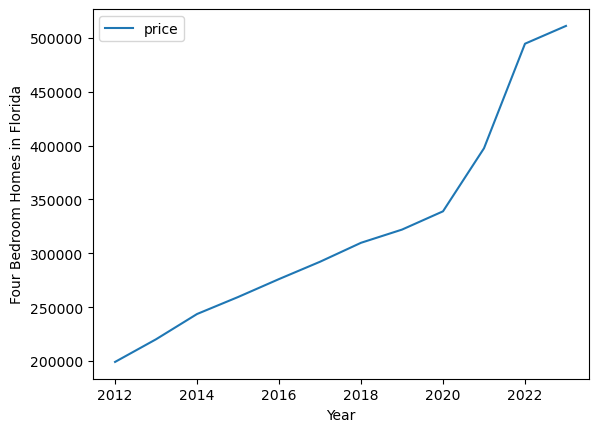

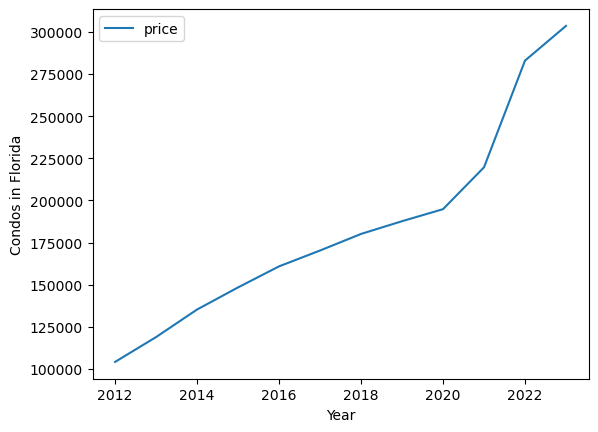

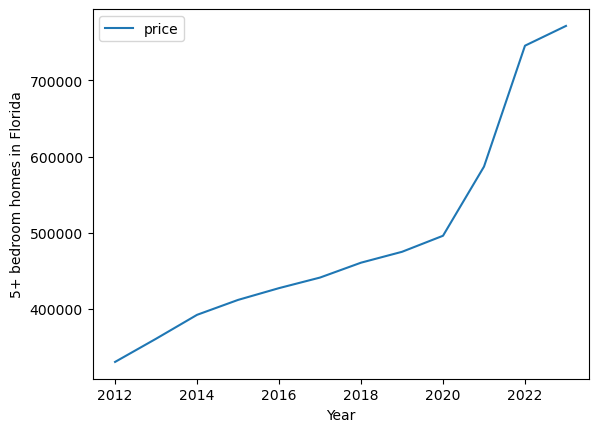

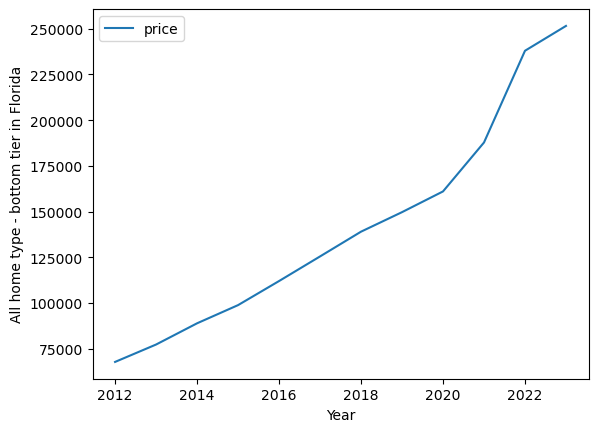

In [16]:
# # Testing florida 4 bedroom homes
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_1 = flor_df[flor_df['property type'] == '4 bedroom homes']
flor_plot1 = flor_1.groupby('year').mean(numeric_only=True)

flor_plot1.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Four Bedroom Homes in Florida')
# # Testing florida condos
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_2 = flor_df[flor_df['property type'] == 'condos']
flor_plot2 = flor_2.groupby('year').mean(numeric_only=True)
flor_plot2.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Condos in Florida')
# # Testing florida 5+ bedroom homes
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_3 = flor_df[flor_df['property type'] == '5+ bedroom homes']
flor_plot3 = flor_3.groupby('year').mean(numeric_only=True)
flor_plot3.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('5+ bedroom homes in Florida')
# # Testing florida All home type - bottom tier
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_4 = flor_df[flor_df['property type'] == 'All home type - bottom tier']
flor_plot4 = flor_4.groupby('year').mean(numeric_only=True)
flor_plot4.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('All home type - bottom tier in Florida')

In [ ]:
# We can clearly see that over the course of ten years, real estate value has nearly tripled in the state of Florida.

In [11]:
cleaning_df['property type'].unique()

array(['5+ bedroom homes', '4 bedroom homes', 'All home types - top tier',
       'condos', '2 bedroom homes', '1 bedroom homes',
       'single-family homes',
       'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)',
       'All home type - bottom tier', '3 bedroom homes'], dtype=object)

Text(0, 0.5, '3 bedroom homes in Michigan')

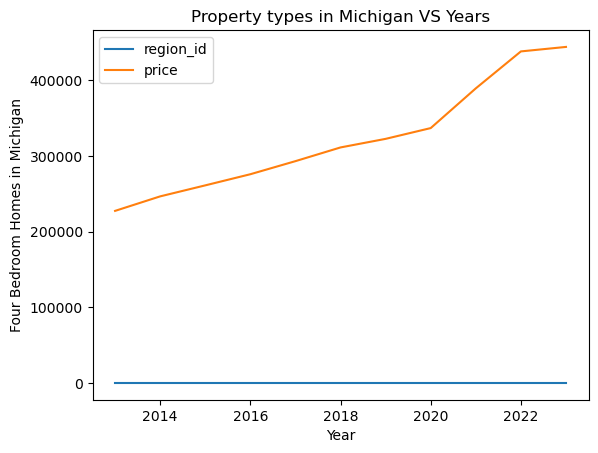

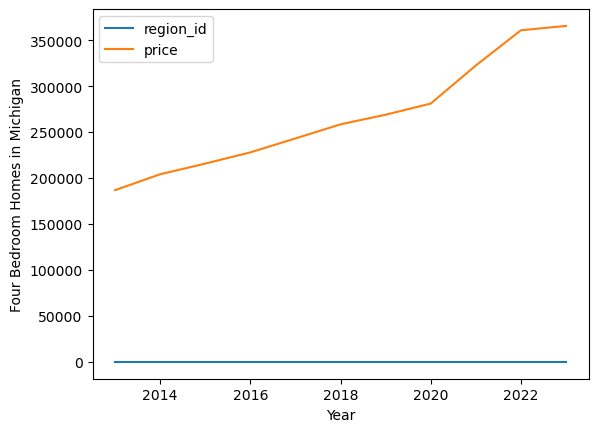

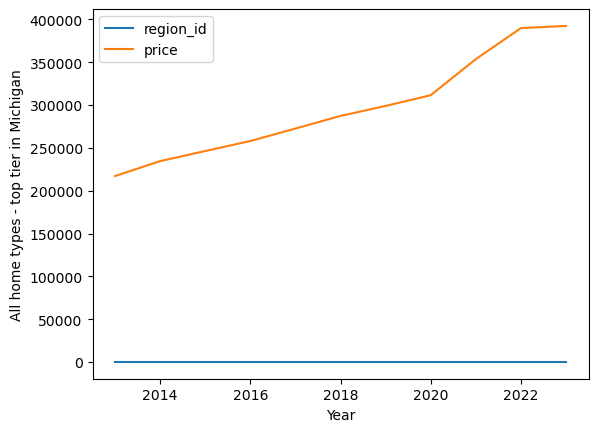

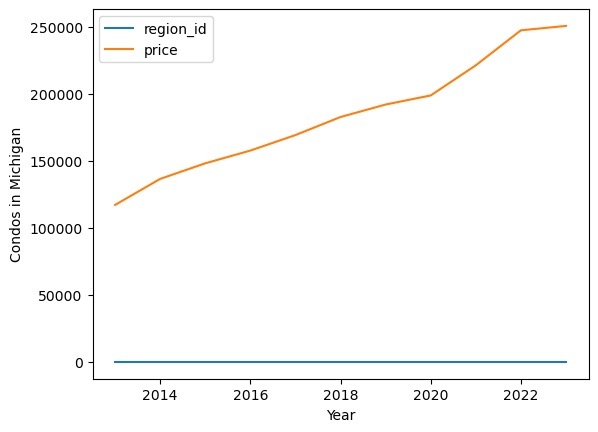

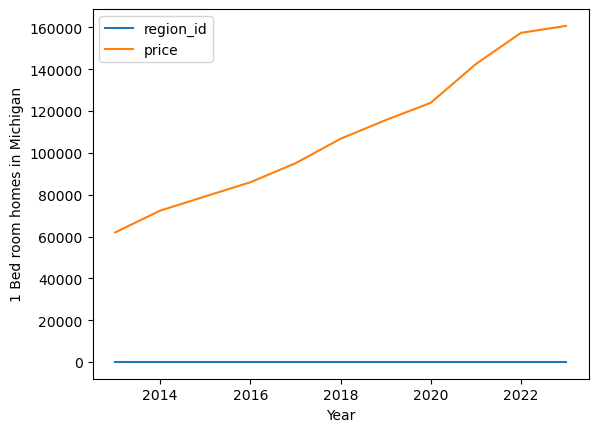

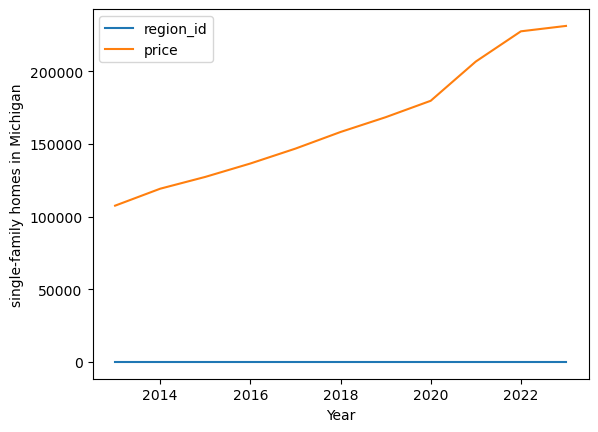

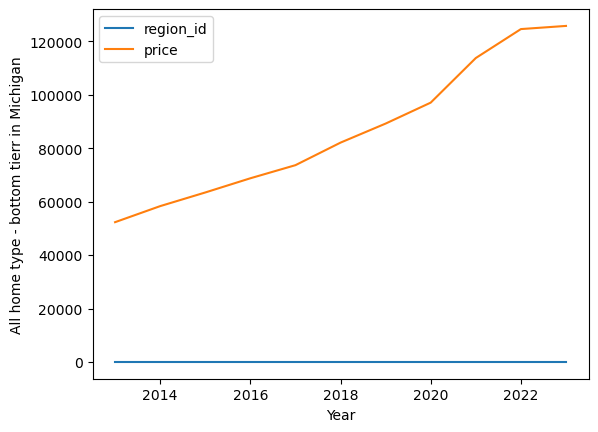

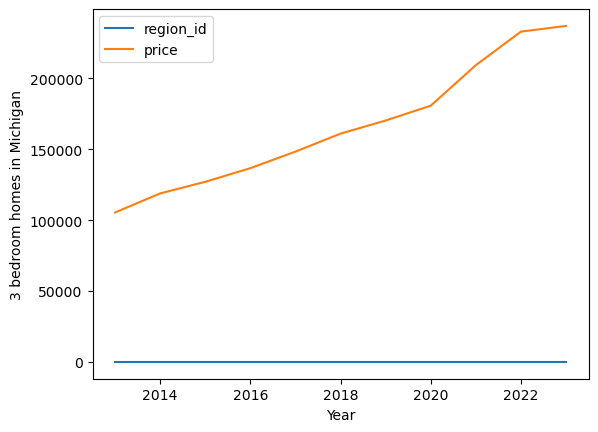

In [20]:
# Bar chart creation for Michigan with different property type

year_df = cleaning_df[cleaning_df['year'] >= 2013]

#Plotting 5+ bedroom homes in various years in Michigan 
Michigan_df = year_df[year_df['state'] == 'Michigan']
MI_1 = Michigan_df[Michigan_df['property type'] == '5+ bedroom homes']
MI_plot1 = MI_1.groupby('year').mean(numeric_only=True)

MI_plot1.plot(kind='line')
plt.title('Property types in Michigan VS Years')
plt.xlabel('Year')
plt.ylabel('Four Bedroom Homes in Michigan')


#Plotting Four bedroom homes in various years in Michigan 

MI_2 = Michigan_df[Michigan_df['property type'] == '4 bedroom homes']
MI_plot2 = MI_2.groupby('year').mean(numeric_only=True)
MI_plot2.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Four Bedroom Homes in Michigan')


#Plotting All home types - top tier in various years in Michigan 
 
MI_3 = Michigan_df[Michigan_df['property type'] == 'All home types - top tier']
MI_plot3 = MI_3.groupby('year').mean(numeric_only=True)
MI_plot3.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('All home types - top tier in Michigan')


#Plotting condos in various years in Michigan 
 
MI_4 = Michigan_df[Michigan_df['property type'] == 'condos']
MI_plot4 = MI_4.groupby('year').mean(numeric_only=True)
MI_plot4.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Condos in Michigan')



#Plotting 1 bedroom homes in various years in Michigan 
 
MI_4 = Michigan_df[Michigan_df['property type'] == '1 bedroom homes']
MI_plot4 = MI_4.groupby('year').mean(numeric_only=True)
MI_plot4.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('1 Bed room homes in Michigan')


#Plotting single-family homes in various years in Michigan 
 
MI_5 = Michigan_df[Michigan_df['property type'] == 'single-family homes']
MI_plot5 = MI_5.groupby('year').mean(numeric_only=True)
MI_plot5.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('single-family homes in Michigan')

#Plotting All home types - bottom tier in various years in Michigan 
 
MI_5 = Michigan_df[Michigan_df['property type'] == 'All home type - bottom tier']
MI_plot5 = MI_5.groupby('year').mean(numeric_only=True)
MI_plot5.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('All home type - bottom tierr in Michigan')



#Plotting 3 bedroom homes in various years in Michigan 
 
MI_5 = Michigan_df[Michigan_df['property type'] == '3 bedroom homes']
MI_plot5 = MI_5.groupby('year').mean(numeric_only=True)
MI_plot5.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('3 bedroom homes in Michigan')




In [ ]:

# We import the matplotlib.pyplot library for creating the plot.
# We assume that your DataFrame 'Michigan_df' contains a column named 'Year' for the x-axis and a column named 'price' for the y-axis.
# We use the groupby method to group the data by 'Year' and calculate the mean of 'price' for each year.
# We then create a line plot using .plot(kind='line').
# We label the x-axis as 'Year' and the y-axis as 'Average Price'.
# Finally, we use plt.show() to display the plot.
# Make sure you have the necessary libraries imported and that your DataFrame 'Michigan_df' contains the required columns for this code to work. Adjust the column names accordingly if they are different in your actual DataFrame.


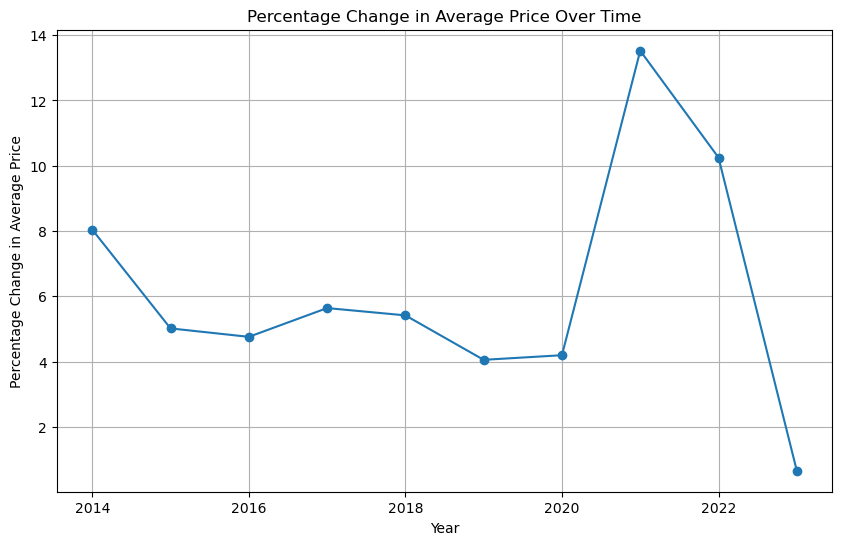

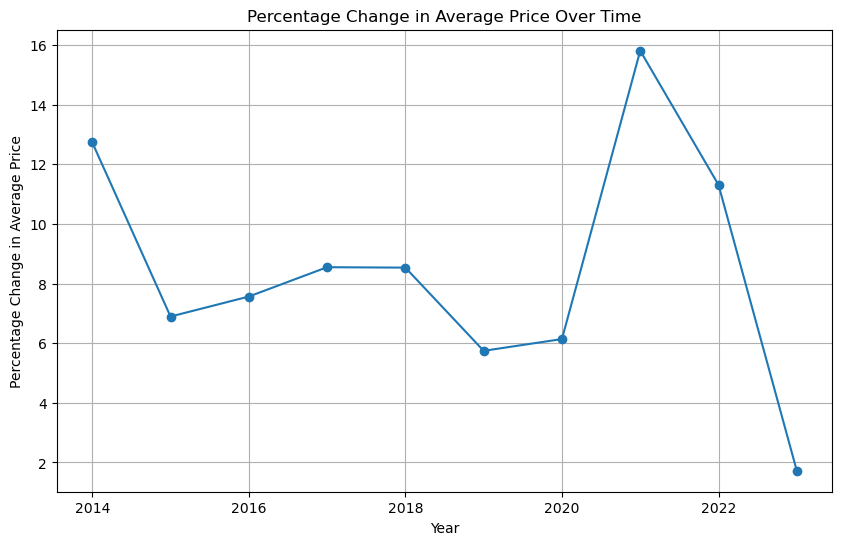

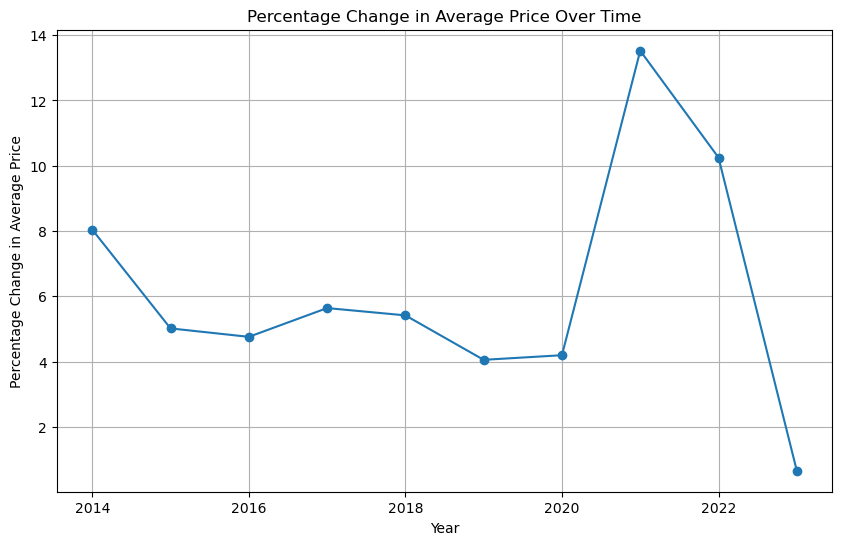

In [13]:
# year VS price in Michigan for property type


# Filter the DataFrame to select only the relevant data
MI_13 = Michigan_df[Michigan_df['property type'] == 'All home types - top tier']

# Group by 'Year' and calculate the mean of 'price'
MI_plot13 = MI_13.groupby('year')['price'].mean()

# Calculate the percentage change from the previous year
percentage_change = MI_plot13.pct_change() * 100

# Create the line plot for percentage change
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(percentage_change.index, percentage_change.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Average Price')
plt.title('Percentage Change in Average Price Over Time')
plt.grid(True)

# Show the plot
plt.show()


# Filter the DataFrame to select only the relevant data
MI_14 = Michigan_df[Michigan_df['property type'] == '3 bedroom homes']

# Group by 'Year' and calculate the mean of 'price'
MI_plot14 = MI_14.groupby('year')['price'].mean()

# Calculate the percentage change from the previous year
percentage_change = MI_plot14.pct_change() * 100

# Create the line plot for percentage change
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(percentage_change.index, percentage_change.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Average Price')
plt.title('Percentage Change in Average Price Over Time')
plt.grid(True)

# Show the plot
plt.show()


# Filter the DataFrame to select only the relevant data
MI_15 = Michigan_df[Michigan_df['property type'] == 'condo']

# Group by 'Year' and calculate the mean of 'price'
MI_plot15 = MI_15.groupby('year')['price'].mean()

# Calculate the percentage change from the previous year
percentage_change = MI_plot13.pct_change() * 100

# Create the line plot for percentage change
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(percentage_change.index, percentage_change.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Average Price')
plt.title('Percentage Change in Average Price Over Time')
plt.grid(True)

# Show the plot
plt.show()




In [ ]:
# We calculate the percentage change in the average price using the pct_change() method from pandas. 
# This method calculates the percentage change from the previous year and multiplies it by 100 to get 
# the percentage.
# We create a line plot of the percentage change using plt.plot(), and we use markers ('o') and a linestyle ('-') 
# to make the plot more visually informative.
# We set labels for the x-axis and y-axis using plt.xlabel() and plt.ylabel().
# We set a title for the plot using plt.title().
# We add a grid to the plot using plt.grid(True) for better visualization.
# Finally, we display the plot using plt.show().
# This code will plot the percentage change in average price over time, helping you visualize how prices 
# have changed from year to year.



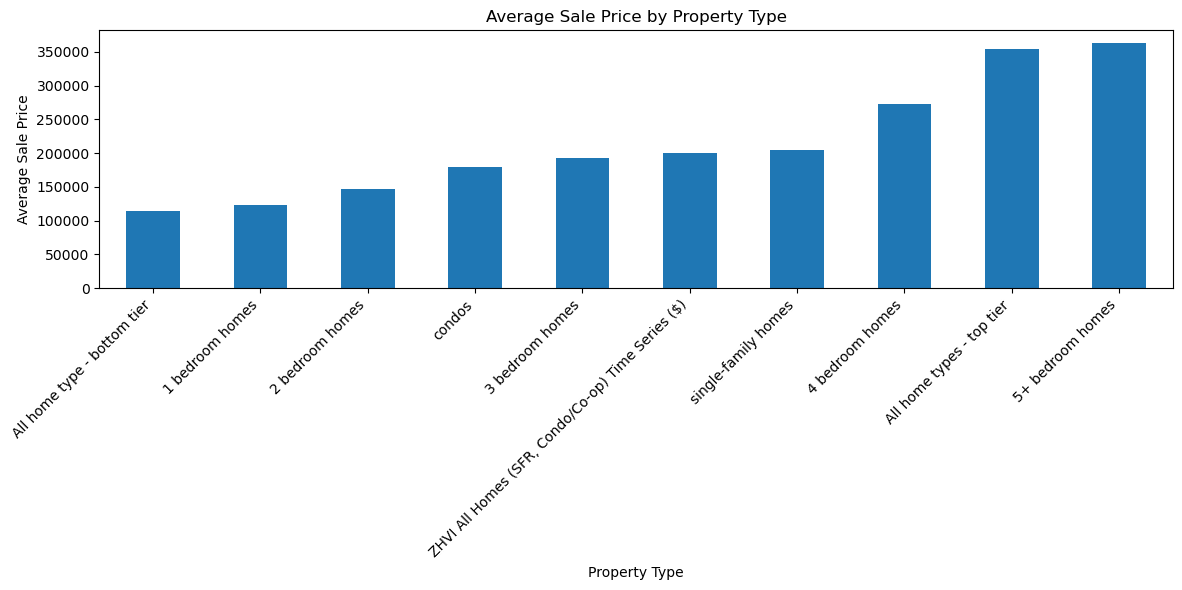

In [17]:
average_prices = cleaning_df.groupby('property type')['price'].mean().sort_values()

# Create a bar plot to visualize the average sale prices
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
average_prices.plot(kind='bar') #, color='skyblue'
plt.title('Average Sale Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensure the plot fits nicely
plt.show()

In [ ]:
# In this code:

# We group the data in cleaning_df by the 'property type' column using groupby() and calculate the mean 
# price for each property type using .mean().
# We sort the average prices in ascending order so that the bar plot will be ordered by property type.
# We create a bar plot using plt.bar(), specifying the kind as 'bar' and setting the color to 'skyblue'.
# We set a title, labels for the x-axis and y-axis, and rotate the x-axis labels for better readability.
# We use plt.tight_layout() to ensure that the plot is nicely formatted.
# Finally, we display the plot using plt.show().
# This code will generate a bar plot showing the average sale price for each property type in your DataFrame. 
# Make sure to adjust the DataFrame and column names if they are different in your actual dataset.

In [18]:
# Filter the DataFrame to select only the relevant data
